In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import calendar
from datetime import datetime,timedelta

import os 
import scipy.stats as sps
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

# os.chdir("E:/200_CASA/07_QM/QM_CW2")
# os.getcwd()

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('seaborn-whitegrid') # specifies that graphs should use ggplot styling
plt1 = "coolwarm"

In [2]:
pd.read_csv("immediateVSconstant_pop.csv")

,Initial-Population,Immediate Growback Carrying Capacity,Constant Growback Carrying Capacity
0,100,74,68.2659
1,110,69,76.0287
2,120,78,73.8777
3,130,87,68.8627
4,140,90,86.3246
5,150,98,100.1948
6,160,107,88.8240
7,170,110,109.4669
8,180,118,113.1161
9,190,121,122.3670


In [3]:
# import environment
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [4]:
df = pd.read_csv("immediateVSconstant_pop.csv")
# CC means Carrying Capacity
df.columns = ['initialPop','immediateCC','constantCC']

In [5]:
df.head(0)

,initialPop,immediateCC,constantCC


In [6]:
df.shape

(91, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   initialPop   91 non-null     int64  
 1   immediateCC  91 non-null     int64  
 2   constantCC   91 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 2.3 KB


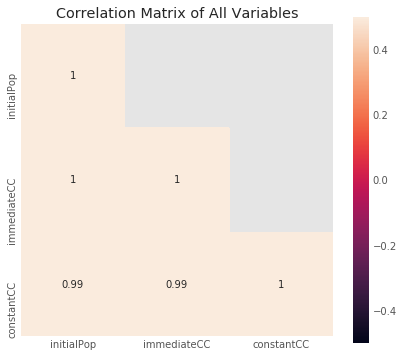

In [8]:
df_cof = df
corrMatt = df.corr() # 计算相关系数
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(7,6)
ax.set(title = "Correlation Matrix of All Variables")
sns.heatmap(corrMatt, mask=mask,vmax=.5, vmin=-.5,square=True,annot=True)
ax.tick_params(axis=u'both',which=u'both',labelright=0,labelleft =1,labelbottom=1,top=0,right=0,left=0,bottom=0,labelsize=10)
# fig.savefig("corr_reg2.png",dpi=300,bbox_inches='tight')

# Hypothesis

For immediate growback model:

$ carryingCapacity = \beta_0 +  \beta_1 \times initialPop $

For immediate growback model:

$ carryingCapacity = \beta_2 +  \beta_3 \times initialPop $

In [9]:
df.columns

Index(['initialPop', 'immediateCC', 'constantCC'], dtype='object')

# Method 1

utilise the method from CASA0007

In [10]:
# import environment
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [11]:
Carrying_Capacity = df.loc[:,['initialPop', 'immediateCC']]

model_Carrying_Capacity = sm.formula.ols('immediateCC ~ initialPop', Carrying_Capacity).fit()

model_Carrying_Capacity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            immediateCC   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.690e+04
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          2.71e-103
Time:                        12:15:14   Log-Likelihood:                -348.16
No. Observations:                  91   AIC:                             700.3
Df Residuals:                      89   BIC:                             705.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.3184      2.730      5.977      0.000      10.894      21.743
initialPop     0.5823      0.004    129.997      0.000       0.573       0.591
==============================================================================
Omnibus:                        4.346   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                4.958
Skew:                           0.168   Prob(JB):                       0.0838
Kurtosis:                       4.093   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

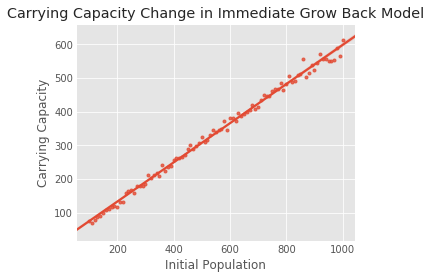

In [20]:
x, y = df.initialPop, df.immediateCC
fig1,ax1 = plt.subplots(ncols=1,nrows=1,figsize=(5,4))
sns.regplot(x=x, y=y, marker=".",truncate=False)
ax1.set(xlabel="Initial Population",ylabel="Carrying Capacity",title="Carrying Capacity Change in Immediate Grow Back Model")
fig1.savefig("immediateCC.png",dpi=300,bbox_inches='tight')
# ax.save_figure("immediateCC.png",dpi=300)

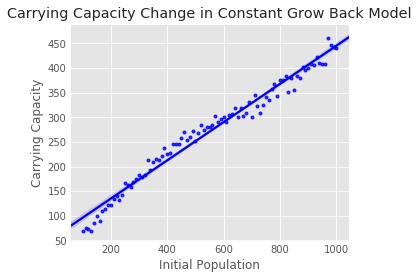

In [19]:
x, y = df.initialPop, df.constantCC
fig2,ax2 = plt.subplots(ncols=1,nrows=1,figsize=(5,4))
sns.regplot(x=x, y=y, marker=".",truncate=False,color = "b")
ax2.set(xlabel="Initial Population",ylabel="Carrying Capacity",title="Carrying Capacity Change in Constant Grow Back Model")
fig2.savefig("constantCC.png",dpi=300,bbox_inches='tight')

Compare with two models, it is easy to find there will be **more turtles surviving** in **constant** growback pattern than that in immediate growback pattern if the numbers of initial population are the same.

# Method 2

ref: https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

utilise statsmodels.api to conduct the regression!

In [21]:
x = df.initialPop
x = sm.add_constant(x)
y = df.immediateCC

immediate_model = sm.OLS(y,x).fit()
# predictions = model.predict(x)
immediate_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            immediateCC   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.690e+04
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          2.71e-103
Time:                        12:32:16   Log-Likelihood:                -348.16
No. Observations:                  91   AIC:                             700.3
Df Residuals:                      89   BIC:                             705.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.3184      2.730      5.977      0.000      10.894      21.743
initialPop     0.5823      0.004    129.997      0.000       0.573       0.591
==============================================================================
Omnibus:                        4.346   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                4.958
Skew:                           0.168   Prob(JB):                       0.0838
Kurtosis:                       4.093   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The output of immediate growback model we can see is that:

$ \beta_0 = 16.318 $

$ \beta_1 = 0.582 $

$ carryingCapacity = 16.318 +  0.582 \times initialPop $

In [24]:
x = df.initialPop
x = sm.add_constant(x)
y = df.constantCC

constant_model = sm.OLS(y,x).fit()
# predictions = model.predict(x)
constant_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             constantCC   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3411.
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           9.27e-73
Time:                        13:21:57   Log-Likelihood:                -383.96
No. Observations:                  91   AIC:                             771.9
Df Residuals:                      89   BIC:                             776.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.4688      4.046     14.203      0.000      49.429      65.508
initialPop     0.3877      0.007     58.406      0.000       0.375       0.401
==============================================================================
Omnibus:                        3.193   Durbin-Watson:                   0.872
Prob(Omnibus):                  0.203   Jarque-Bera (JB):                2.379
Skew:                          -0.242   Prob(JB):                        0.304
Kurtosis:                       2.373   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The output of constant growback model we can see is that:

$ \beta_2 = 57.467 $

$ \beta_3 = 0.388 $

$ carryingCapacity = 57.467 +  0.388 \times initialPop $

# Results

So you can see, to compare with two models, the aggregation of results are below:

Immediate Pattern:  

$ carryingCapacity  = 16.318 +  0.582 \times initialPop $

Constant Pattern:  
    
$ carryingCapacity  = 57.467 +  0.388 \times initialPop $

To calculate the intersection point, let values of initialPop be the same, we can see:

(y - 16 ) / 0.6 = (y -57) / 0.4

4(y-16) = 6(y-57)

57*6 - 4*16 = 2*y

y = 57*3 - 16*2 = 139

the Intersection point is (...,139)





In [ ]:
x = (57.467 - 16.318) / (0.582 - 0.388)
y = 16.318+0.582*x
print("the intersection point is ("+ str(x) +","+ str(y) +")")

The initial population is about 212 and the carrying capacity is 139.

When the initial pop is above the 212, the carrying capacity in immediate model will be stronger than that in constant model.

# Growth Rate

## gowth rate = currentPop / urrentPop - initialPop

$ growth = {{currentPop\space - \space {initialPop}} \over {averagePop}} \times 100 \% $

$ avaragePop = {{currentPop\space + \space {initialPop}} \over 2} $